In [43]:
# this code will hide the coding cells..
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [54]:
# import 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import HTML
from scipy import stats
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import datetime as dt
df = pd.read_csv('c:/users/nanot/webscraping/scrapy/jre/data_clean/jre2_clean.csv')

In [55]:
# a few cleaning bits..
# change the name of the tag, 'atheletes-fighters-martial-arts' to something else...
df['tag'] = df.tag.str.replace('athletes-fighters-martial-arts', 'athletes-fighters')
# get rid of the episode number from the title
df['ep_title'] = df.ep_title.str.replace('\\#\d{1,4}- ', '')
# drop 'best of' episodes, episodes less than 55 min, and fight companion episodes..
mask1 = ~df.ep_title.str.contains('Best of')
mask2 = df.runtime > 55
mask3 = ~df.ep_title.str.contains('Fight Companion')
df = df[mask1&mask2&mask3]

# change the date format using pd.to_datetime(), and then set the airdate as index.
df['airdate'] = pd.to_datetime(df.airdate)
df = df.set_index('airdate')

# create two separate data frames: 1 with no tag column, and one with tag column.  Then drop the duplicates from the dataframe
dft = df.copy()
df = df.drop('tag', axis = 1)
df = df.drop_duplicates()

# set universal font size
fs = 15

In [56]:
# define masks for the data
# masks for the outliers of tagless df
s = 3
mask_outliers_views = (np.abs(stats.zscore(df.views)) > s)
mask_outliers_runtime = (np.abs(stats.zscore(df.runtime)) > s)
mask_outliers_likes = (np.abs(stats.zscore(df.likes)) > s)
mask_outliers_dislikes = (np.abs(stats.zscore(df.dislikes)) > s)
mask_outliers_ratio = (np.abs(stats.zscore(df.ratio)) > s)
# masks for the outliers of df with tags
tmask_outliers_views = (np.abs(stats.zscore(dft.views)) > s)
tmask_outliers_runtime = (np.abs(stats.zscore(dft.runtime)) > s)
tmask_outliers_likes = (np.abs(stats.zscore(dft.likes)) > s)
tmask_outliers_dislikes = (np.abs(stats.zscore(dft.dislikes)) > s)
tmask_outliers_ratio = (np.abs(stats.zscore(dft.ratio)) > s)
# combos for both dfs
mask_or = ~mask_outliers_views & ~mask_outliers_likes & ~mask_outliers_dislikes & ~mask_outliers_ratio # outlier removal mask
tmask_or = ~tmask_outliers_views & ~tmask_outliers_likes & ~tmask_outliers_dislikes & ~tmask_outliers_ratio # outlier removal mask for tag df

#create time slice for last 2 years..
#dft_2ys = dft['2017-06':'2019-06']

df_or = df[mask_or]

In [57]:
# functions

# switch case function to choose year.
def slide_switch(x):
    if x == 8:
        return '2019-07-04'
    switcher = {
        1: '2013',
        2: '2014',
        3: '2015',
        4: '2016',
        5: '2017',
        6: '2018',
        7: '2019'
        }
    return switcher[x]

# take upper and lower bound for a year and return a list of tags which have more than 30 observations
def tags_with_thirty(yr_lower, yr_upper):
    return pd.DataFrame(dft[yr_lower:yr_upper].groupby('tag').ep_title.count()[dft[yr_lower:yr_upper].groupby('tag').ep_title.count() >= 30]).reset_index().tag.tolist()


Analysis of The Joe Rogan Experience Podcast

Intro:
The Joe Rogan Experience is a popular and unusually structured podcast in which guests sit and casually converse with its host, Joe Rogan.  Being that the show takes on different flavor depending on the guest, I thought it may be interesting to see if there are any obvious statistical differences amongst the many categories that may describe each episode.  But first, I wanted to take a general look at the data collected.

Dataset:
The dataset was scraped from JREpodcast.com--a third-party fan-made website with video links to every episode.  Nearly all entries included data such as title (which includes the guest), duration, number of views, number of likes, number of dislikes, and ratio.  This information wasn't too hard to scrape, but what I really wanted was the category, which proved to be more chanllenging to obtain.  When the scrape was complete, I had two datasets to clean: one with categories and one without.

Results

In [58]:
df.sample(10)

,ep,ep_title,runtime,views,likes,dislikes,ratio
airdate,,,,,,,
2017-10-24,1027.0,Courtney Dauwalter,102.65,1368762,18584,829,22.42
2013-11-14,417.0,Graham Hancock,164.37,629033,6239,327,19.08
2017-09-14,1011.0,Tom Papa,199.77,734390,5994,1130,5.30
2014-11-27,580.0,"Lewis, from Unbox Therapy",179.47,100229,895,119,7.52
2016-11-08,869.0,Dave Rubin,209.67,692526,8699,525,16.57
2014-04-09,482.0,Rob MacCachren & Bud Brutsman,119.28,42373,290,39,7.44
2013-06-01,258.0,Bryan Callen,159.92,10021,104,5,20.80
2013-10-17,1.0,Joe Rogan Questions Everything #1 Duncan Truss...,155.33,166736,1307,91,14.36
2015-12-02,729.0,Jocko Willink,171.52,1822473,21068,1221,17.25


In [59]:
dft.sample(10)

,ep,ep_title,tag,runtime,views,likes,dislikes,ratio
airdate,,,,,,,,
2014-12-02,581.0,Andreas Antonopoulos,it-game-dev-programming,173.95,140879,1510,56,26.96
2018-01-10,1061.0,Tom Papa,writers,185.37,737311,5813,540,10.76
2019-04-27,65.0,Corey Anderson,athletes-fighters,190.87,595436,7490,739,10.14
2013-02-11,161.0,Bert Kreischer,comedians,177.72,72407,544,41,13.27
2019-03-19,1266.0,Ben Anderson,journalists,138.60,1194797,15460,1608,9.61
2018-10-11,1184.0,Roseanne Barr,comedians,133.12,2358787,42870,4071,10.53
2016-05-31,803.0,Joey Diaz & Lee Syatt,comedians,171.03,2722192,18673,1323,14.11
2013-03-04,331.0,Dr. Steven Greer,comedians,171.93,1604364,13415,1541,8.71
2019-01-25,1231.0,Matt Braunger,actors,138.77,764334,6818,1994,3.42


In [60]:
# plot time series of views
# need to format the plot.  label y axis, and get more tick marks, maybe...
cols = ['views', 'likes', 'dislikes']
ylabels = ['Views (10 Mil)', 'Likes', 'Dislikes']
@interact
def ts(DropOutliers = False):
    if DropOutliers:
        dfs = df_or
    else:
        dfs = df
    axes = dfs[cols].plot(marker='.', title = 'Number of Views Since the Beginning of the Podcast', figsize=(15,10), subplots = True, legend = False, grid = True)
    # There are a few spikes that are interesting.  Who are these people receving so many views?
    plt.subplots_adjust(top=.95, left=.25)
    #plt.ylabel(['Dislikes', 'Likes', 'Views (10 Mil)'])
    i = 0
    for ax in axes:
        ax.set_ylabel(ylabels[i])
        ax.set_xlabel('Air Date')
        i += 1
    

interactive(children=(Checkbox(value=False, description='DropOutliers'), Output()), _dom_classes=('widget-inte…

In [61]:
#Histogram
col_list = ['views', 'likes', 'dislikes', 'ratio', 'runtime']
@interact
def histogram_by_col(DropOutliers = False, LastTwoYears = False, Columns=col_list):
    if LastTwoYears:
        start_date = '2017-06'
    else:
        start_date = '2013-01-15'
    if DropOutliers:
        dfthist = dft_or
    else:
        dfthist = dft 
    fs = 15
    axes = dfthist[start_date:'2019-07-04'][Columns].hist( color = 'c',figsize=(8,8))
    axes.set_ylabel('Count', fontsize = fs)
    axes.set_xlabel(Columns, fontsize = fs)
#     axes.set_title(Columns, fontsize=fs)
    

interactive(children=(Checkbox(value=False, description='DropOutliers'), Checkbox(value=False, description='La…

In [106]:
@interact

def ep_views(x=(1,7), ByYear=True):
    yr_lower = slide_switch(x)
    yr_upper = slide_switch(x+1)
    # attempting to get two plots side by side.
    fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(20,10))

    n = 10
    if ByYear:
        ep_count = dft[yr_lower:yr_upper].groupby('tag').ep_title.count().nlargest(n)
        avg_views = dft[yr_lower:yr_upper].groupby('tag').views.mean().nlargest(n)
        title_string1 = '{} Top {} Number of Episodes by Category'.format(yr_lower,n)
        title_string2 = '{} Top {} Average Number of Views by Category'.format(yr_lower,n)
    else:
        ep_count = dft.groupby('tag').ep_title.count().nlargest(n)
        avg_views = dft.groupby('tag').views.mean().nlargest(n)
        title_string1 = 'Top {} Number of Episodes by Category'.format(n)
        title_string2 = 'Top {} Average Number of Views by Category'.format(n)



    ax.axes.set_title(title_string1, fontsize=fs+2)
    ax.axes.set_xlabel('Number of Episodes', fontsize = fs)

    viewlim = 18e5
    ax2.axes.set_title(title_string2, fontsize=fs+2)
    #ax2.axes.set_xticks([viewlim/2, viewlim])
    #ax2.axes.set_xlim((min(avg_views), max(avg_views)))
    ax2.axes.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
    ax2.axes.set_xlabel('Number of Views in Millions', fontsize=fs)



    ep_count.sort_values(ascending=True).plot(kind='barh', x='LABEL',  legend=False, ax=ax, fontsize = fs+5, color='b')
    avg_views.sort_values(ascending=True).plot(kind='barh', x='LABEL',ax=ax2, fontsize = fs+5, color='c')
    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=4, description='x', max=7, min=1), Checkbox(value=True, description='ByY…

In [63]:
# get a count of episodes per category
@interact
def ep_count_by_cat(x=(1,7)):
    
    yr_lower = slide_switch(x)
    yr_upper = slide_switch(x+1)
    fs = 15
    axes = dft[yr_lower:yr_upper].groupby('tag').ep_title.count().sort_values(ascending=True).plot.barh(color = 'c', fontsize = fs, figsize=(10,10))
    axes.set_ylabel('Category', fontsize = fs)
    axes.set_xlabel('Episode Count', fontsize = fs)
    axes.set_title('{} Number of Episodes by Category'.format(yr_lower), fontsize=fs)

interactive(children=(IntSlider(value=4, description='x', max=7, min=1), Output()), _dom_classes=('widget-inte…

In [64]:
# barplot 

@interact
def barplot_views_by_cat(DropOutliers = False, x=(1,7)):
    yr_lower = slide_switch(x)
    yr_upper = slide_switch(x+1)
    
    if DropOutliers:
        dftbar = dft_or
    else:
        dftbar = dft 
    fs = 15
    axes = dftbar[yr_lower:yr_upper].groupby('tag').views.mean().sort_values(ascending=True).plot.barh(color = 'c', fontsize = 15, figsize=(10,10))
    axes.set_ylabel('Guest', fontsize = fs)
    axes.set_xlabel('Views', fontsize = fs)
    axes.set_title('{} Views by Category'.format(yr_lower), fontsize=fs)
    

interactive(children=(Checkbox(value=False, description='DropOutliers'), IntSlider(value=4, description='x', m…

In [65]:



# I want to choose a column from col list and display box plots from specific tags on the same plot.
dft_or = dft[tmask_or]
# how do i select columns for this...?
col_list = ['views', 'likes', 'dislikes', 'ratio', 'runtime']


tag = ['politics', 'athletes-fighters', 'authors', 'comedians', 'filmmakers', 'health', 'journalists', 'miscellaneous', 'musicians', 'politics', 'writers']

@interact
def box_plots_by_col(column=col_list, WithOutliers=False, ShowFliers = False, LastTwoYears = False, FirstTwoYears = False):
    
    if FirstTwoYears:
        start_date='2013-01-15'
        end_date='2015-01'
        title_string = 'Distributions Within %s For First Two Years'%(column.capitalize())
    else:
        start_date='2013-01-15'
        end_date='2019-07-04'
        title_string = 'Distributions Within %s'%(column.capitalize())
    if LastTwoYears:
        start_date = '2017-06'
        end_date='2019-07-04'
        title_string = 'Distributions Within %s For Last Two Years'%(column.capitalize())
    else:
        start_date = '2013-01-15'
        end_date='2019-07-04'
        title_string = 'Distributions Within %s'%(column.capitalize())
    if WithOutliers:
        dftbox=dft
    else:
        dftbox=dft_or
    cat = tags_with_thirty(start_date,end_date)
        
    fs = 17
    axes = dftbox[dftbox.tag.isin(cat)][start_date:end_date].boxplot(showfliers = ShowFliers, by = 'tag', column=column, figsize=(20,7), fontsize = fs)
    axes.set_ylim(0,)
    axes.set_title(title_string, fontsize = fs)
    axes.set_ylabel('Count', fontsize = fs)
    axes.set_xlabel('Category', fontsize = fs)
    return axes



interactive(children=(Dropdown(description='column', options=('views', 'likes', 'dislikes', 'ratio', 'runtime'…

In [66]:
# compare boxplots by year.

# return list of tags which have 30 episodes or more in the count for that year interval:


@interact
def box_plots_by_col(column=col_list, WithOutliers=False, ShowFliers = False, x=(1,7)):
    yr_lower = slide_switch(x)
    yr_upper = slide_switch(x+1)
    cat = tags_with_thirty(yr_lower, yr_upper)
    
    
    if WithOutliers:
        dftbox=dft
    else:
        dftbox=dft_or
        
    fs = 17
    axes = dftbox[dftbox.tag.isin(cat)][yr_lower:yr_upper].boxplot(showfliers = ShowFliers, by = 'tag', column=column, figsize=(20,7), fontsize = fs)
    axes.set_ylim(0,)
    axes.set_title('{} Distributions Within %s'.format(yr_lower)%(column.capitalize()), fontsize = fs)
    axes.set_ylabel('Count', fontsize = fs)
    axes.set_xlabel('Category', fontsize = fs)
    return axes

interactive(children=(Dropdown(description='column', options=('views', 'likes', 'dislikes', 'ratio', 'runtime'…

In [67]:
dft_or = dft[tmask_or]
tag = ['politics', 'athletes-fighters', 'authors', 'comedians', 'filmmakers', 'health', 'journalists', 'miscellaneous', 'musicians', 'politics', 'writers']


@interact

def box_plots(category=dft_or.tag.unique().tolist(), WithOutliers=False, ShowFliers = False):
    if WithOutliers:
        dftbox=dft
    else:
        dftbox=dft_or
    tag = category
    
    the_plot = dftbox[dftbox.tag.isin([tag])].plot(showfliers = ShowFliers, title = 'Distributions Within %s'%(tag.capitalize()), fontsize=15,  y = col_list, kind='box', layout = (2,3), subplots = True, figsize = (20,8))
    return the_plot

interactive(children=(Dropdown(description='category', options=('writers', 'musicians', 'politics', 'models', …

In [68]:
#set up interact to get top views..
col_list = ['views', 'likes', 'dislikes', 'ratio', 'runtime']
@interact
def horz_bar_plot(column = col_list, n=(1, 50), DropOutliers = False):
    if DropOutliers:
        dfbar = df_or
    else:
        dfbar = df 
    
    if n > 30:
        fs = n/2
    else:
        fs = 12
    axes = dfbar.nlargest(n, column).groupby('ep_title')[column].max().sort_values(ascending=True).plot.barh(fontsize=fs, color='b', figsize=(5,fs/2))
    axes.set_ylabel('Guest', fontsize = fs)
    axes.set_xlabel(column.capitalize(), fontsize = fs)
    axes.set_title('Top {} Guests by Number of {}'.format(n, column.capitalize()), fontsize=fs)
    

interactive(children=(Dropdown(description='column', options=('views', 'likes', 'dislikes', 'ratio', 'runtime'…

Text(0.5, 1.0, 'Average Views per Number of Episodes by Category')

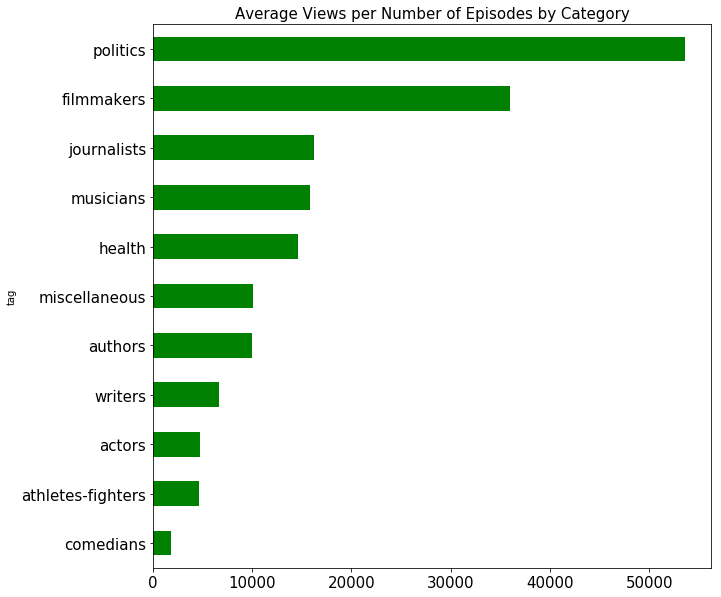

In [104]:
# I need to make a new dataframe indexed by tag with mean values of variables and avg views per number of episodes.
dft_tag_count = pd.DataFrame(dft.groupby('tag').ep_title.count())
dft_tag_count = pd.concat([dft.groupby('tag').mean(), pd.DataFrame(dft.groupby('tag').ep_title.count())], axis=1)

# now drop ep from the columns, because it makes not sense in this context..
dft_tag_count = dft_tag_count.drop('ep', axis=1)

# rename ep_title to reflect the change.  It is now a count of episodes.
dft_tag_count = dft_tag_count.rename(index=str, columns={'ep_title': 'episode_count'})

# add the new column to show average number of views per number of episodes in each category.
dft_tag_count['views_per_count'] = dft_tag_count.views/dft_tag_count.episode_count

# since some categories have very few episodes, I decided to implement a cutoff of at least 30 episodes.
mask_30 = dft_tag_count.episode_count >= 30
the_plot = dft_tag_count[mask_30].views_per_count.sort_values().plot.barh(figsize = (10,10), fontsize = fs, color='g')
the_plot.set_title('Average Views per Number of Episodes by Category', fontsize=fs)


Further work:
-Explore transformation techniques, especially when dealing with the left-skewed plots.
-Consolidate some of the categories.
-Add visualization to illustrate the increase in podcast listeners since the beginning of JRE
-Explore transcripts for nlp
-explore the sentiment of extreme values of likes or dislikes over social media comments
-implement stat test to test among variables

In [110]:
# How should I go about the ANOVA among categories?  Maybe use Kruskal-Wallis.  First, I will need lists of views from each
# category.


# so this will return a list of views from politics.
dft[dft.tag == 'politics'].views.tolist()

# that is nice, but I need one for all tags with 30 or more episodes.
# I could do it manually, but I think there is better way.



[2085641,
 1174038,
 1597884,
 1862803,
 2035513,
 1859978,
 1702891,
 1786590,
 3472520,
 602106,
 74033,
 175848,
 55925,
 8499,
 84479,
 23457,
 1341143,
 2828309,
 101476,
 79010,
 79115,
 305701,
 2135954,
 564831,
 233969,
 149212,
 429829,
 13444126,
 460583,
 3709555,
 9383993,
 692526,
 3790544]